In [41]:

import pandas as pd
from sklearn import metrics

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

cancer.csv.3        100%[===================>] 122.27K  --.-KB/s    in 0.001s  


In [42]:
import os             
import numpy as np    
import pandas as pd   
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


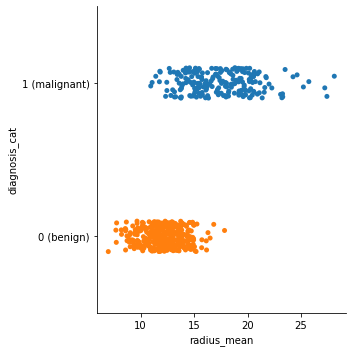

In [43]:
data_path  = 'cancer.csv'

dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})



sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

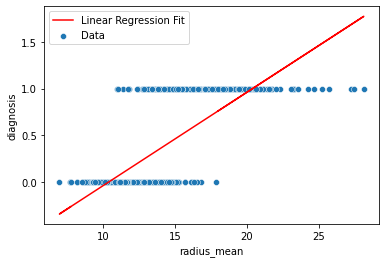

In [44]:


X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

In [45]:

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [46]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


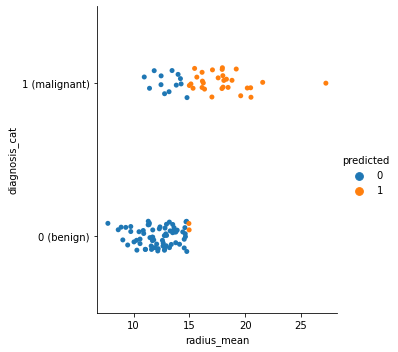

In [47]:
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)
X_test = test_df[X]
y_test = test_df[y]
y_pred = logreg_model.predict(X_test)
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


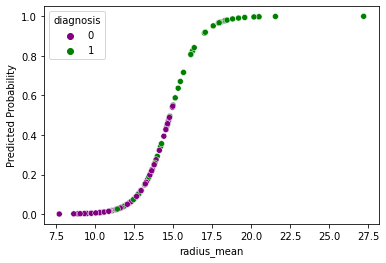

In [49]:
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

Confusion Matrix

Text(0.5, 257.44, 'Predicted diagnosis')

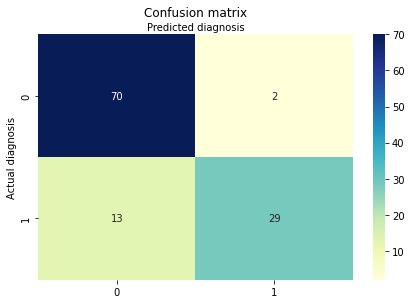

In [50]:
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')